In [57]:
from dgp import *
from source_estimator import *
import sys, importlib
import seaborn as sns
importlib.reload(sys.modules['source_estimator'])
import matplotlib.pyplot as plt

In [58]:
J = 3
I = J-1
n = 10000
A = np.random.uniform(low = -3, high = 3, size = (I,J))
S = np.random.laplace(size = (J,n)) 
X = (A @ S).T


In [59]:
est = SourceEstimator(noise= False)
est.fit(X,A)

Fitting the model to the data in the noiseless case


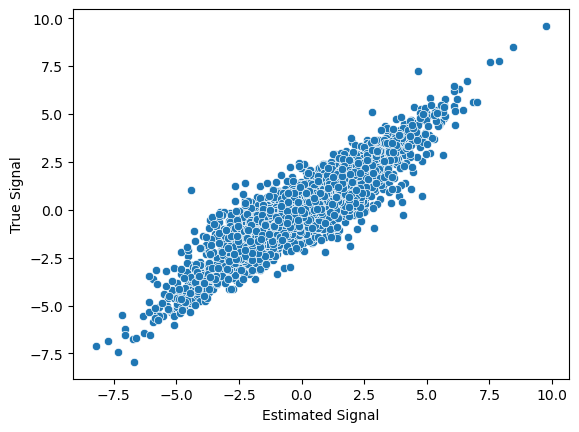

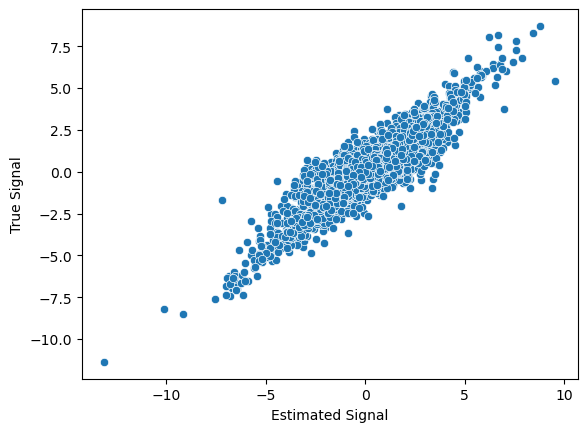

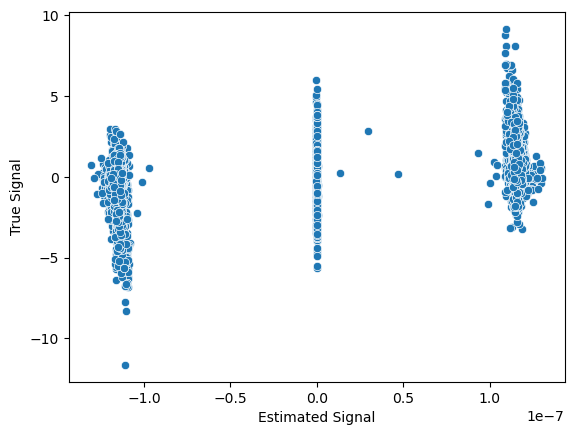

In [60]:
# plot the estimated signals vs the true signals 
for i in range(J):
    signal_est = est.Signals[:, i]
    signal_true = S[i,:]
    sns.scatterplot(x=signal_est, y=signal_true)
    plt.xlabel('Estimated Signal')
    plt.ylabel('True Signal')
    plt.show()

In [61]:
X_hat = A @ est.Signals.T

In [62]:
X_hat.T

array([[ 0.41557241,  4.13499189],
       [13.27686488, -2.69722869],
       [-0.02826453,  0.55315958],
       ...,
       [ 0.86791526, -2.34540832],
       [ 2.38349863, -1.00987314],
       [-1.9446275 ,  3.92833888]])

In [63]:
X.T

array([[ 0.41557241, 13.27686488, -0.02826453, ...,  0.86791526,
         2.38349863, -1.9446275 ],
       [ 4.13499189, -2.69722869,  0.55315958, ..., -2.34540832,
        -1.00987314,  3.92833888]])

Text(0, 0.5, 'True Signal')

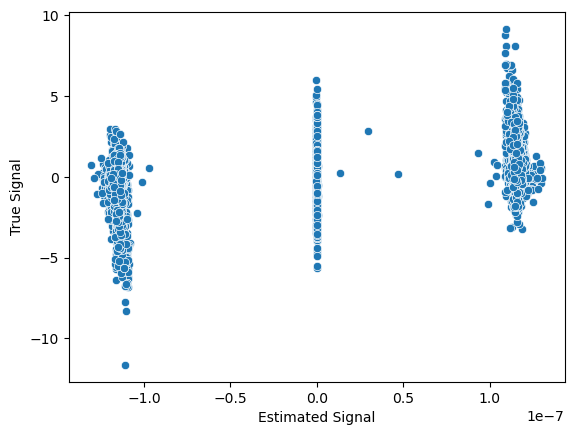

In [64]:
signal_est_2 = est.Signals[:, 2]
signal_true_2 = S[2, :]

sns.scatterplot(x=signal_est_2, y=signal_true_2)
plt.xlabel('Estimated Signal')
plt.ylabel('True Signal')

In [65]:
signal = np.random.laplace(size = (6,10000), loc = 0, scale = 1)
mat = np.random.rand(5,6)

obs = mat @ signal
print(obs.shape)
mat.shape

(5, 10000)


(5, 6)

In [66]:
est = SourceEstimator( noise = False)
est.fit(obs.T,mat)

Fitting the model to the data in the noiseless case


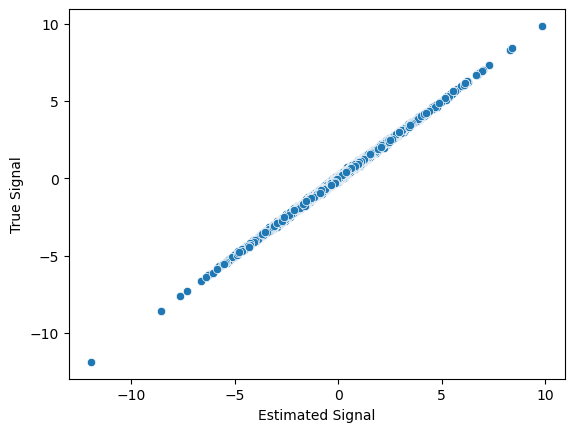

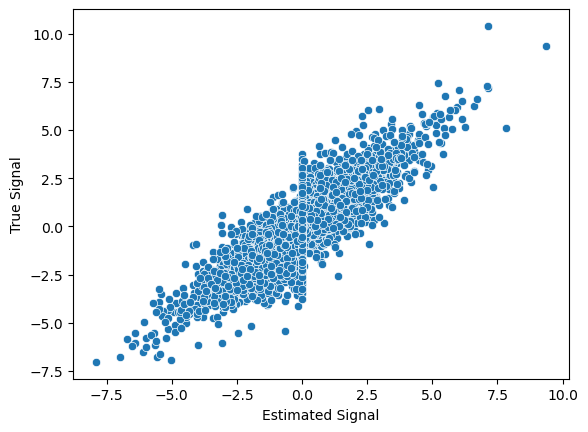

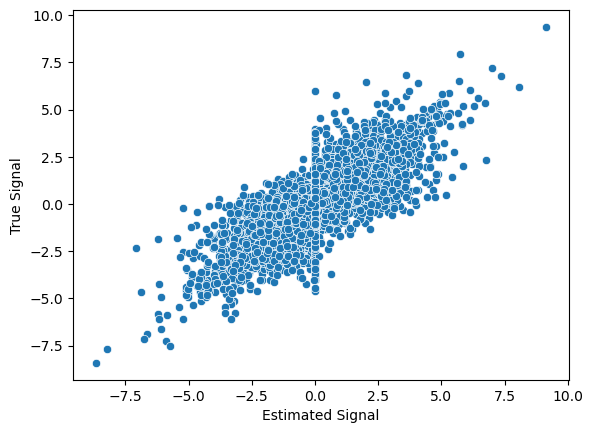

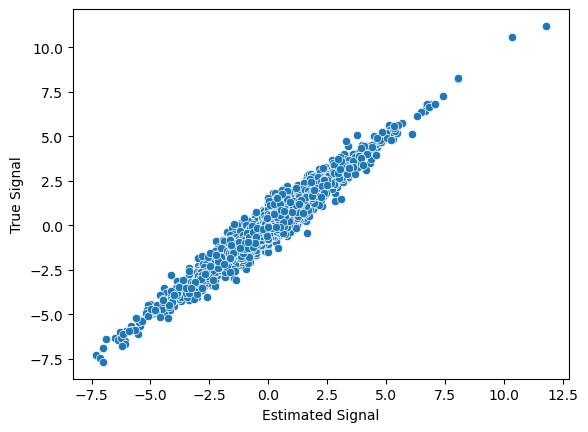

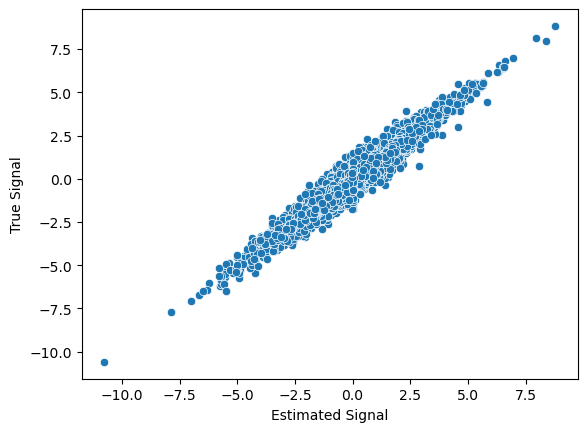

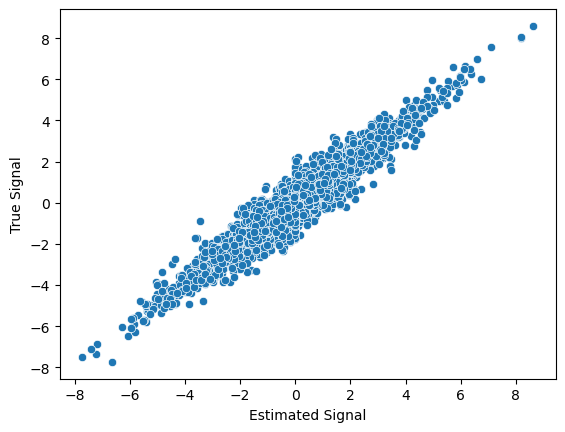

In [67]:
# plot the estimated signals vs the true signals 
for i in range(mat.shape[1]):
    signal_est = est.Signals[:, i]
    signal_true = signal[i, :]
    sns.scatterplot(x=signal_est, y=signal_true)
    plt.xlabel('Estimated Signal')
    plt.ylabel('True Signal')
    plt.show()

<Axes: >

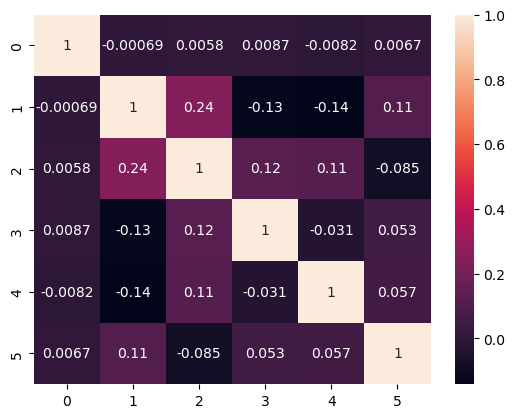

In [68]:
# correlation between the estimated signals
correlation = np.corrcoef(est.Signals.T)
sns.heatmap(correlation, annot=True)